In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from models import LSTNet
import importlib

from utils import *;
import Optim

#显示中文
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

data_path='D:/Codes/nCov/LSTNet-master/data/'

In [16]:
inputfile="D:/Codes/nCov/data/out_increase_province_2.20.csv"

# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)
# 设置value的显示长度为100，默认为50
pd.set_option('max_colwidth', 200)

#读取数据
dataf = pd.read_csv(inputfile, encoding='UTF-8')

     Unnamed: 0   新增死亡    新增治愈     新增确诊          日期         省     省死亡  \
0             0    1.0     9.0      1.0  2020-02-20       浙江省     1.0   
1           383    0.0    69.0      2.0  2020-02-19       浙江省     0.0   
2           810    0.0    28.0      1.0  2020-02-18       浙江省     0.0   
3          1238    0.0    51.0      4.0  2020-02-17       浙江省     0.0   
4          1663    0.0    28.0      5.0  2020-02-16       浙江省     0.0   
5          2078    0.0    25.0      7.0  2020-02-15       浙江省     0.0   
6          2504    0.0    43.0     10.0  2020-02-14       浙江省     0.0   
7          2914    0.0    39.0     14.0  2020-02-13       浙江省     0.0   
8          3341    0.0    51.0     14.0  2020-02-12       浙江省     0.0   
9          3768    0.0    28.0     25.0  2020-02-11       浙江省     0.0   
10         4183    0.0    41.0     17.0  2020-02-10       浙江省     0.0   
11         4603    0.0    26.0     27.0  2020-02-09       浙江省     0.0   
12         5021    0.0    52.0     42.0  2020-02-08

In [3]:
#提取对应省份的数据
data_zhejiang=dataf.loc[dataf['省']=='浙江省'].iloc[:,1:4]
print(data_zhejiang)
#对数据进行处理，将数据中的负数消除
for index,data in data_zhejiang.iterrows():
    for name in data.iteritems():
        if name[1]<0:
            data_zhejiang.loc[index+1,name[0]]+=name[1]
            data_zhejiang.loc[index,name[0]]=0
data_zj=data_zhejiang.iloc[::-1]
data_zj.to_csv(data_path+'data_zhejiang_2.20.txt', header=0,index=False)

    新增死亡  新增治愈   新增确诊
0    1.0   9.0    1.0
1    0.0  69.0    2.0
2    0.0  28.0    1.0
3    0.0  51.0    4.0
4    0.0  28.0    5.0
5    0.0  25.0    7.0
6    0.0  43.0   10.0
7    0.0  39.0   14.0
8    0.0  51.0   14.0
9    0.0  28.0   25.0
10   0.0  41.0   17.0
11   0.0  26.0   27.0
12   0.0  52.0   42.0
13   0.0  29.0   52.0
14   0.0  16.0   59.0
15   0.0  16.0   66.0
16   0.0  19.0  105.0
17  -1.0  11.0   63.0
18   1.0  11.0   62.0
19   0.0   7.0   61.0
20   0.0  10.0  110.0
21   0.0   1.0  132.0
22   0.0   0.0  123.0
23   0.0   2.0   45.0
24   0.0   0.0   24.0
25   0.0   0.0   42.0
26   0.0   0.0   19.0
27   0.0   1.0   43.0


In [4]:
#提取对应省份的数据
data_hb=dataf.loc[dataf['省']=='湖北省'].iloc[:,1:4]
print(data_hb)
# data_hb.iloc[5,2]=(data_hb.iloc[4,2]+data_hb.iloc[6,2])/2
#对数据进行处理，将数据中的负数消除
for index,data in data_hb.iterrows():
    for name in data.iteritems():
        if name[1]<0:
            data_hb.loc[index+1,name[0]]+=name[1]
            data_hb.loc[index,name[0]]=0
data_hb=data_hb.iloc[::-1]
data_hb.to_csv(data_path+'data_hubei_reduced_2.20.txt', header=0,index=False)

     新增死亡    新增治愈     新增确诊
28  108.0  1017.0    349.0
29  132.0  1393.0   1693.0
30   93.0  1250.0   1807.0
31  100.0  1027.0   1933.0
32  139.0   845.0   1843.0
33   31.0   690.0   2420.0
34  116.0   672.0   3780.0
35  242.0   773.0  14840.0
36   94.0   376.0   1638.0
37  103.0   456.0   2097.0
38   91.0   374.0   2531.0
39   81.0   262.0   2147.0
40   81.0   351.0   2841.0
41   69.0   155.0   2447.0
42   70.0   175.0   2987.0
43   65.0   139.0   3156.0
44   64.0    98.0   2345.0
45   56.0    33.0   2103.0
46   45.0    99.0   1921.0
47   45.0    27.0   1347.0
48   42.0    51.0    903.0
49   37.0     3.0   1349.0
50   25.0    35.0    840.0
51   24.0     5.0   1291.0
52   24.0     5.0    365.0
53   13.0    10.0    328.0
54   15.0     1.0    181.0
55   24.0    31.0    549.0


    新增死亡  新增治愈   新增确诊
27   0.0   1.0   43.0
26   0.0   0.0   19.0
25   0.0   0.0   42.0
24   0.0   0.0   24.0
23   0.0   2.0   45.0
22   0.0   0.0  123.0
21   0.0   1.0  132.0
20   0.0  10.0  110.0
19   0.0   7.0   61.0
18   0.0  11.0   62.0
17   0.0  11.0   63.0
16   0.0  19.0  105.0
15   0.0  16.0   66.0
14   0.0  16.0   59.0
13   0.0  29.0   52.0
12   0.0  52.0   42.0
11   0.0  26.0   27.0
10   0.0  41.0   17.0
9    0.0  28.0   25.0
8    0.0  51.0   14.0
7    0.0  39.0   14.0
6    0.0  43.0   10.0
5    0.0  25.0    7.0
4    0.0  28.0    5.0
3    0.0  51.0    4.0
2    0.0  28.0    1.0
1    0.0  69.0    2.0
0    1.0   9.0    1.0


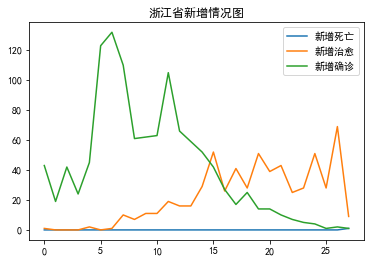

In [5]:
print(data_zj)
data_zj.plot(title='浙江省新增情况图',use_index=False)
plt.savefig('figure/zhejiang.png',dpi=500)
plt.show()

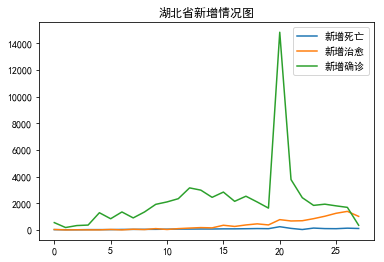

In [6]:
data_hb.plot(title='湖北省新增情况图',use_index=False)
plt.savefig('figure/hubei.png',dpi=500)
plt.show()

In [6]:
#读取模型
with open('save/hubei.pt', 'rb') as f:
    model = torch.load(f)
data_zj=pd.read_table('data/data_hubei.txt',header=None,sep=',')
data_zj=data_zj[::-1]
print(data_zj)


        0       1        2
25   93.0  1250.0   1807.0
24  100.0  1027.0   1933.0
23  139.0   845.0   1843.0
22   31.0   690.0   2420.0
21  116.0   672.0   3780.0
20  242.0   773.0  14840.0
19   94.0   376.0   1638.0
18  103.0   456.0   2097.0
17   91.0   374.0   2531.0
16   81.0   262.0   2147.0
15   81.0   351.0   2841.0
14   69.0   155.0   2447.0
13   70.0   175.0   2987.0
12   65.0   139.0   3156.0
11   64.0    98.0   2345.0
10   56.0    33.0   2103.0
9    45.0    99.0   1921.0
8    45.0    27.0   1347.0
7    42.0    51.0    903.0
6    37.0     3.0   1349.0
5    25.0    35.0    840.0
4    24.0     5.0   1291.0
3    24.0     5.0    365.0
2    13.0    10.0    328.0
1    15.0     1.0    181.0
0    24.0    31.0    549.0


In [7]:
i=0
dt=data_zj.iloc[3-i:8-i,:]
dt=dt[::-1]
#预测的前5个值
first_5=dt
dt=dt.values
dt=np.expand_dims(dt,axis=0)
print(dt)
x=Variable(torch.FloatTensor(dt))
y=model(x).data.numpy()
Y=np.expand_dims(y,axis=0)
#预测的后5个值
later_5=pd.DataFrame(y)

[[[  103.   456.  2097.]
  [   94.   376.  1638.]
  [  242.   773. 14840.]
  [  116.   672.  3780.]
  [   31.   690.  2420.]]]


In [8]:
new_dt=dt[:,1:,:]
dt_1=np.concatenate((new_dt,Y),axis=1)
for i in range(4):
    x=Variable(torch.FloatTensor(dt_1))
    y=model(x).data.numpy()
    Y=np.expand_dims(y,axis=0)
    later_5=later_5.append(pd.DataFrame(y))
    dt_1=dt_1[:,1:,:]
    dt_1=np.concatenate((dt_1,Y),axis=1)

In [9]:
predict_10=first_5.append(later_5).reset_index(drop=True)
print(predict_10)

            0           1             2
0  103.000000  456.000000   2097.000000
1   94.000000  376.000000   1638.000000
2  242.000000  773.000000  14840.000000
3  116.000000  672.000000   3780.000000
4   31.000000  690.000000   2420.000000
5   -2.228494  157.335922  -1243.747070
6   -5.878054   60.716484   -434.522705
7   -2.306558  -69.682503   -737.887146
8   -0.523528  -28.804552    -32.716103
9    1.368735  -28.981379    -74.826424


In [11]:
#读取真实值
data_true=pd.read_table('data/data_hubei_2.20.txt',header=None,sep=',')
data_true=data_true.iloc[-10:,:].reset_index(drop=True)
print(data_true)

       0       1        2
0  103.0   456.0   2097.0
1   94.0   376.0   1638.0
2  242.0   773.0  14840.0
3  116.0   672.0   3780.0
4   31.0   690.0   2420.0
5  139.0   845.0   1843.0
6  100.0  1027.0   1933.0
7   93.0  1250.0   1807.0
8  132.0  1393.0   1693.0
9  108.0  1017.0    349.0


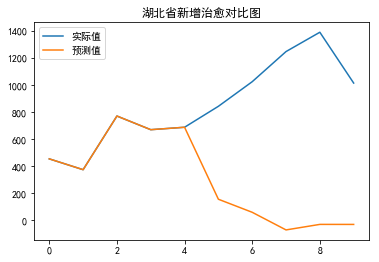

In [23]:
#显示新增治愈图像
plt.plot(data_true.iloc[:,1],label='实际值')
plt.plot(predict_10.iloc[:,1],label='预测值')
plt.legend()
plt.title('湖北省新增治愈对比图')
plt.savefig('figure/湖北省新增治愈对比图.png',dpi=500)

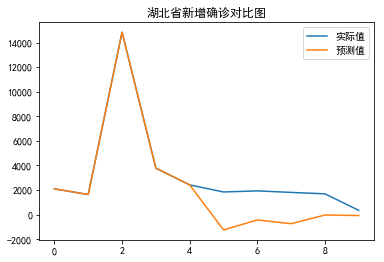

In [24]:
plt.plot(data_true.iloc[:,2],label='实际值')
plt.plot(predict_10.iloc[:,2],label='预测值')
plt.legend()
plt.title('湖北省新增确诊对比图')
plt.savefig('figure/湖北省新增确诊对比图.png',dpi=500)

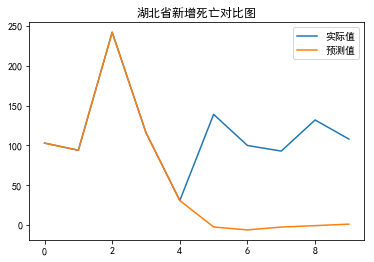

In [12]:
plt.plot(data_true.iloc[:,0],label='实际值')
plt.plot(predict_10.iloc[:,0],label='预测值')
plt.legend()
plt.title('湖北省新增死亡对比图')
plt.savefig('figure/湖北省新增死亡对比图.png',dpi=500)